<a href="https://colab.research.google.com/github/asenka239/compMath/blob/main/Home_task_%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

## Задача № 1

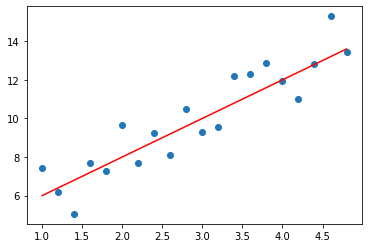

In [ ]:
true_w1 = 2
true_w0 = 4
# print('True w:', true_w1, true_w0)

xs = np.arange(1, 5, 0.2)
noise = np.random.normal(0, 1, size=xs.shape)
ys = xs * true_w1 + true_w0 + noise

plt.scatter(xs, ys)
plt.plot(xs, ys - noise, c='r')
plt.show()

Минимизация по МНК постоянной величиной означает просто-напросто среднее от выборки: $$\hat{y} = \bar{y} = \frac{1}{l} \sum_{i=1}^{l} y_i$$

In [ ]:
y_hat = ys.mean()
print(f'y_hat = {y_hat}')

y_hat = 9.972428233229786


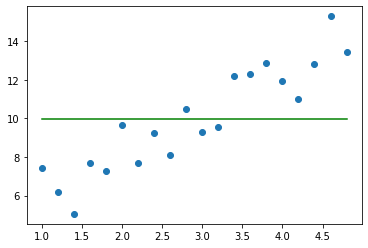

In [ ]:
plt.scatter(xs, ys)
# plt.plot(xs, ys - noise, c='r')
plt.plot(xs, np.full(xs.shape, ys.mean()), c='g')
plt.show()

## Задача № 2

In [ ]:
import seaborn as sns

In [ ]:
data = sns.load_dataset('anscombe')
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [ ]:
np.var(data[data.dataset=='I']['x'])
np.corrcoef(data[data.dataset=='I']['x'], data[data.dataset=='I']['y'])[0,1]

0.81642051634484

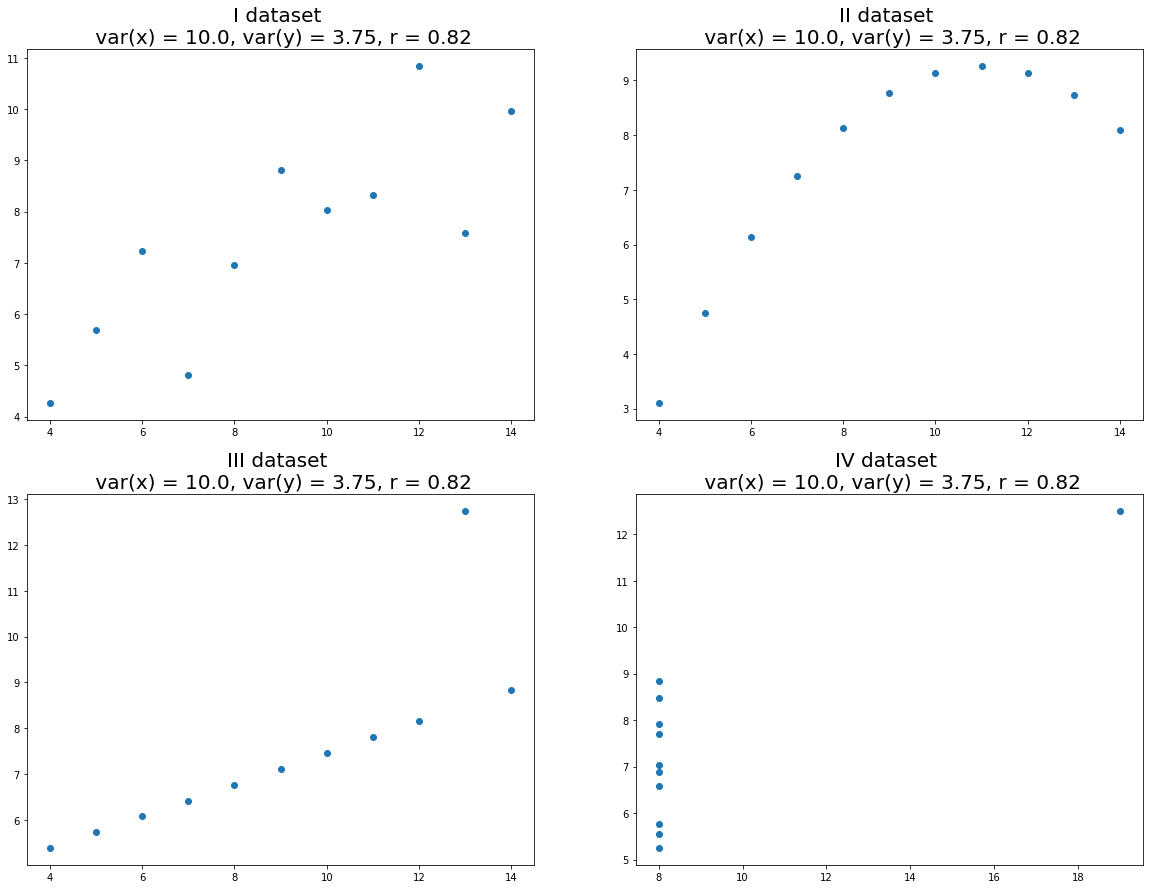

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs[0][0].scatter(data[data.dataset=='I']['x'], data[data.dataset=='I']['y'])
axs[0][0].set_title(f"I dataset \n var(x) = {np.var(data[data.dataset=='I']['x'])}, var(y) = {round(np.var(data[data.dataset=='I']['y']), 2)}, r = {round(np.corrcoef(data[data.dataset=='I']['x'], data[data.dataset=='I']['y'])[0,1], 2)}", fontsize=20)
axs[0][1].scatter(data[data.dataset=='II']['x'], data[data.dataset=='II']['y'])
axs[0][1].set_title(f"II dataset \n var(x) = {np.var(data[data.dataset=='II']['x'])}, var(y) = {round(np.var(data[data.dataset=='II']['y']), 2)}, r = {round(np.corrcoef(data[data.dataset=='II']['x'], data[data.dataset=='II']['y'])[0,1], 2)}", fontsize=20)
axs[1][0].scatter(data[data.dataset=='III']['x'], data[data.dataset=='III']['y'])
axs[1][0].set_title(f"III dataset \n var(x) = {np.var(data[data.dataset=='III']['x'])}, var(y) = {round(np.var(data[data.dataset=='III']['y']), 2)}, r = {round(np.corrcoef(data[data.dataset=='III']['x'], data[data.dataset=='III']['y'])[0,1], 2)}", fontsize=20)
axs[1][1].scatter(data[data.dataset=='IV']['x'], data[data.dataset=='IV']['y'])
axs[1][1].set_title(f"IV dataset \n var(x) = {np.var(data[data.dataset=='IV']['x'])}, var(y) = {round(np.var(data[data.dataset=='IV']['y']), 2)}, r = {round(np.corrcoef(data[data.dataset=='IV']['x'], data[data.dataset=='IV']['y'])[0,1], 2)}", fontsize=20)
plt.show()

Все вычисления получились одинаковыми, хотя датасеты выглядят по разному.

## Задание 4

Обработка лабораторной работы по кольцам Ньютона, в которой измеряется зависимость квадрата радиуса колец от их номера.

In [ ]:
from pandas import read_excel

In [ ]:
data= read_excel("rings.xlsx")
data.head()

,m,l1 т,l2 т,r_m^2,l1,l2,r_m’^2
0,0,4.71,3.72,0.25,4.15,4.15,0.00
1,1,5.00,3.24,0.77,4.78,3.43,0.46
2,2,5.45,2.92,1.60,5.16,3.08,1.08
3,3,5.59,2.65,2.16,5.44,2.79,1.76
4,4,5.83,2.42,2.91,5.70,2.54,2.50


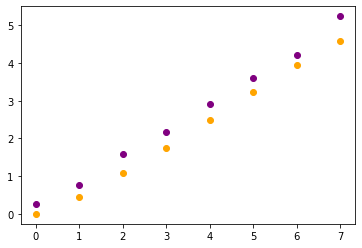

In [ ]:
m = data['m']
r_dark = data['r_m^2']
r_light = data['r_m’^2']

plt.scatter(m, r_dark, c='purple')
plt.scatter(m, r_light, c='orange')
plt.show()

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr_dark = linear_model.LinearRegression()
regr_light = linear_model.LinearRegression()

# Train the model using the training sets
regr_dark.fit(np.array(m).reshape(-1, 1), r_dark)
regr_light.fit(np.array(m).reshape(-1, 1), r_light)

# Make predictions using the testing set
y_pred_dark = regr_dark.predict(np.array(m).reshape(-1, 1))
y_pred_light = regr_light.predict(np.array(m).reshape(-1, 1))

# The coefficients
print('Coefficients for dark: \n', regr_dark.coef_)
print('Coefficients for light: \n', regr_light.coef_)
# The mean squared error
print('Mean squared error for dark: %.2f'
      % mean_squared_error(r_dark, y_pred_dark))
print('Mean squared error for light: %.2f'
      % mean_squared_error(r_light, y_pred_light))


Coefficients for dark: 
 [0.70119048]
Coefficients for light: 
 [0.6752381]
Mean squared error for dark: 0.01
Mean squared error for light: 0.01


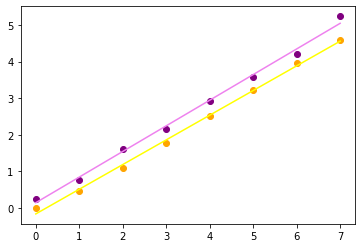

In [ ]:
plt.scatter(m, r_dark, c='purple')
plt.scatter(m, r_light, c='orange')
plt.plot(m, y_pred_dark, color='violet', )
plt.plot(m, y_pred_light, color='yellow', )
plt.show()